# Simple PDF conversion and result inspection

In [1]:
# requirements for this example:
%pip install -qq docling rich

Note: you may need to restart the kernel to use updated packages.


In [2]:
import json
import warnings
from pathlib import Path
from tempfile import TemporaryDirectory

import rich

warnings.filterwarnings(action="ignore", category=UserWarning, module="pydantic|torch")
warnings.filterwarnings(action="ignore", category=FutureWarning, module="easyocr")

## Convert the PDF document

In [3]:
from docling.document_converter import DocumentConverter

source = "https://arxiv.org/pdf/2206.01062"  # DocLayNet paper
converter = DocumentConverter()
conv_res = converter.convert_single(source)
doc = conv_res.output

Fetching 7 files:   0%|          | 0/7 [00:00<?, ?it/s]

## Inspect the native doc representation

In this section we will inspect the document representation produced by the conversion.

In [4]:
doc_dict = doc.model_dump()

For a full inspection, run the cell below, providing you with a complete JSON file:

In [5]:
file_path = Path(f"{(json_tmp_dir := TemporaryDirectory()).name}") / "doc.json"
with open(file_path, "w") as f:
    json.dump(doc_dict, f, indent=4)
print(f"Your file is located at: {file_path}")

Your file is located at: /var/folders/76/4wwfs06x6835kcwj4186c0nc0000gn/T/tmpre5js_vg/doc.json


For space considerations, below we only display a part between a start and an end position of the `main-text` key.

👉 Notice the various layout metadata extracted: *types* (e.g. section headers, paragraphs), *page numbers*, *bounding boxes* etc. 

(You may also notice there is a *table reference*, but the actual content is not shown below, as it is outside `main-text`; it can be inspected in the full file above though.)

In [6]:
START_POS, END_POS = 90, 98
rich.print(doc_dict["main-text"][START_POS:END_POS])

[
    {
        'text': 'Baselines for Object Detection',
        'type': 'subtitle-level-1',
        'name': 'Section-header',
        'font': None,
        'prov': [
            {
                'bbox': [317.1941223144531, 284.5037841796875, 466.8532409667969, 295.42913818359375],
                'page': 6,
                'span': [0, 30],
                '__ref_s3_data': None
            }
        ]
    },
    {
        'text': 'In Table 2, we present baseline experiments (given in mAP) on Mask R-CNN [12], Faster R-CNN [11], 
and YOLOv5 [13]. Both training and evaluation were performed on RGB images with dimensions of 1025 × 1025 pixels. 
For training, we only used one annotation in case of redundantly annotated pages. As one can observe, the variation
in mAP between the models is rather low, but overall between 6 and 10% lower than the mAP computed from the 
pairwise human annotations on triple-annotated pages. This gives a good indication that the DocLayNet dataset poses
a worthwhile challenge for the research community to close the gap between human recognition and ML approaches. It 
is interesting to see that Mask R-CNN and Faster R-CNN produce very comparable mAP scores, indicating that 
pixel-based image segmentation derived from bounding-boxes does not help to obtain better predictions. On the other
hand, the more recent Yolov5x model does very well and even out-performs humans on selected labels such as Text , 
Table and Picture . This is not entirely surprising, as Text , Table and Picture are abundant and the most visually
distinctive in a document.',
        'type': 'paragraph',
        'name': 'Text',
        'font': None,
        'prov': [
            {
                'bbox': [317.0144348144531, 85.2998275756836, 558.7822875976562, 280.8944396972656],
                'page': 6,
                'span': [0, 1146],
                '__ref_s3_data': None
            }
        ]
    },
    {
        'text': 'DocLayNet: A Large Human-Annotated Dataset for Document-Layout Analysis',
        'type': 'page-header',
        'name': 'Page-header',
        'font': None,
        'prov': [
            {
                'bbox': [53.35094451904297, 722.9555053710938, 347.0172424316406, 732.038818359375],
                'page': 7,
                'span': [0, 71],
                '__ref_s3_data': None
            }
        ]
    },
    {
        'text': 'KDD ’22, August 14-18, 2022, Washington, DC, USA',
        'type': 'page-header',
        'name': 'Page-header',
        'font': None,
        'prov': [
            {
                'bbox': [365.1936950683594, 723.0802001953125, 558.7797241210938, 731.8773803710938],
                'page': 7,
                'span': [0, 48],
                '__ref_s3_data': None
            }
        ]
    },
    {
        'text': 'Table 3: Performance of a Mask R-CNN R50 network in mAP@0.5-0.95 scores trained on DocLayNet with 
different class label sets. The reduced label sets were obtained by either down-mapping or dropping labels.',
        'type': 'caption',
        'name': 'Caption',
        'font': None,
        'prov': [
            {
                'bbox': [52.8690299987793, 663.3739624023438, 295.6486511230469, 705.8510131835938],
                'page': 7,
                'span': [0, 205],
                '__ref_s3_data': None
            }
        ]
    },
    {'name': 'Table', 'type': 'table', '$ref': '#/tables/2'},
    {
        'text': 'Learning Curve',
        'type': 'subtitle-level-1',
        'name': 'Section-header',
        'font': None,
        'prov': [
            {
                'bbox': [53.446834564208984, 461.592041015625, 131.05624389648438, 472.6955871582031],
                'page': 7,
                'span': [0, 14],
                '__ref_s3_data': None
            }
        ]
    },
    {
        'text': 'One of the fundamental questions related to any dataset is if it is "large enough". To answer this
question for DocLayNet, we performed a data ablation s

## Inspect the Markdown export

In this section we look at the Markdown export.

For a full inspection, run the cell below, providing you with a complete Markdown file:

In [7]:
doc_slice_md = doc.export_to_markdown()
md_path = Path(f"{(md_tmp_dir := TemporaryDirectory()).name}") / "doc.md"
with open(md_path, "w") as f:
    f.write(doc_slice_md)
print(f"Your file is located at: {md_path}")

Your file is located at: /var/folders/76/4wwfs06x6835kcwj4186c0nc0000gn/T/tmp9j_sqqqd/doc.md


For space considerations, we here only display a part — using the same start and end position as further above:

In [8]:
from IPython.display import Markdown, display

doc_slice_md = doc.export_to_markdown(
    main_text_start=START_POS,
    main_text_stop=END_POS,
)
display(Markdown(doc_slice_md))

## Baselines for Object Detection

In Table 2, we present baseline experiments (given in mAP) on Mask R-CNN [12], Faster R-CNN [11], and YOLOv5 [13]. Both training and evaluation were performed on RGB images with dimensions of 1025 × 1025 pixels. For training, we only used one annotation in case of redundantly annotated pages. As one can observe, the variation in mAP between the models is rather low, but overall between 6 and 10% lower than the mAP computed from the pairwise human annotations on triple-annotated pages. This gives a good indication that the DocLayNet dataset poses a worthwhile challenge for the research community to close the gap between human recognition and ML approaches. It is interesting to see that Mask R-CNN and Faster R-CNN produce very comparable mAP scores, indicating that pixel-based image segmentation derived from bounding-boxes does not help to obtain better predictions. On the other hand, the more recent Yolov5x model does very well and even out-performs humans on selected labels such as Text , Table and Picture . This is not entirely surprising, as Text , Table and Picture are abundant and the most visually distinctive in a document.

Table 3: Performance of a Mask R-CNN R50 network in mAP@0.5-0.95 scores trained on DocLayNet with different class label sets. The reduced label sets were obtained by either down-mapping or dropping labels.

| Class-count    |   11 | 6       | 5       | 4       |
|----------------|------|---------|---------|---------|
| Caption        |   68 | Text    | Text    | Text    |
| Footnote       |   71 | Text    | Text    | Text    |
| Formula        |   60 | Text    | Text    | Text    |
| List-item      |   81 | Text    | 82      | Text    |
| Page-footer    |   62 | 62      | -       | -       |
| Page-header    |   72 | 68      | -       | -       |
| Picture        |   72 | 72      | 72      | 72      |
| Section-header |   68 | 67      | 69      | 68      |
| Table          |   82 | 83      | 82      | 82      |
| Text           |   85 | 84      | 84      | 84      |
| Title          |   77 | Sec.-h. | Sec.-h. | Sec.-h. |
| Overall        |   72 | 73      | 78      | 77      |

## Learning Curve

One of the fundamental questions related to any dataset is if it is "large enough". To answer this question for DocLayNet, we performed a data ablation study in which we evaluated a Mask R-CNN model trained on increasing fractions of the DocLayNet dataset. As can be seen in Figure 5, the mAP score rises sharply in the beginning and eventually levels out. To estimate the error-bar on the metrics, we ran the training five times on the entire data-set. This resulted in a 1% error-bar, depicted by the shaded area in Figure 5. In the inset of Figure 5, we show the exact same data-points, but with a logarithmic scale on the x-axis. As is expected, the mAP score increases linearly as a function of the data-size in the inset. The curve ultimately flattens out between the 80% and 100% mark, with the 80% mark falling within the error-bars of the 100% mark. This provides a good indication that the model would not improve significantly by yet increasing the data size. Rather, it would probably benefit more from improved data consistency (as discussed in Section 3), data augmentation methods [23], or the addition of more document categories and styles.

For a quick comparison, the relevant part of the original PDF document is shown below:

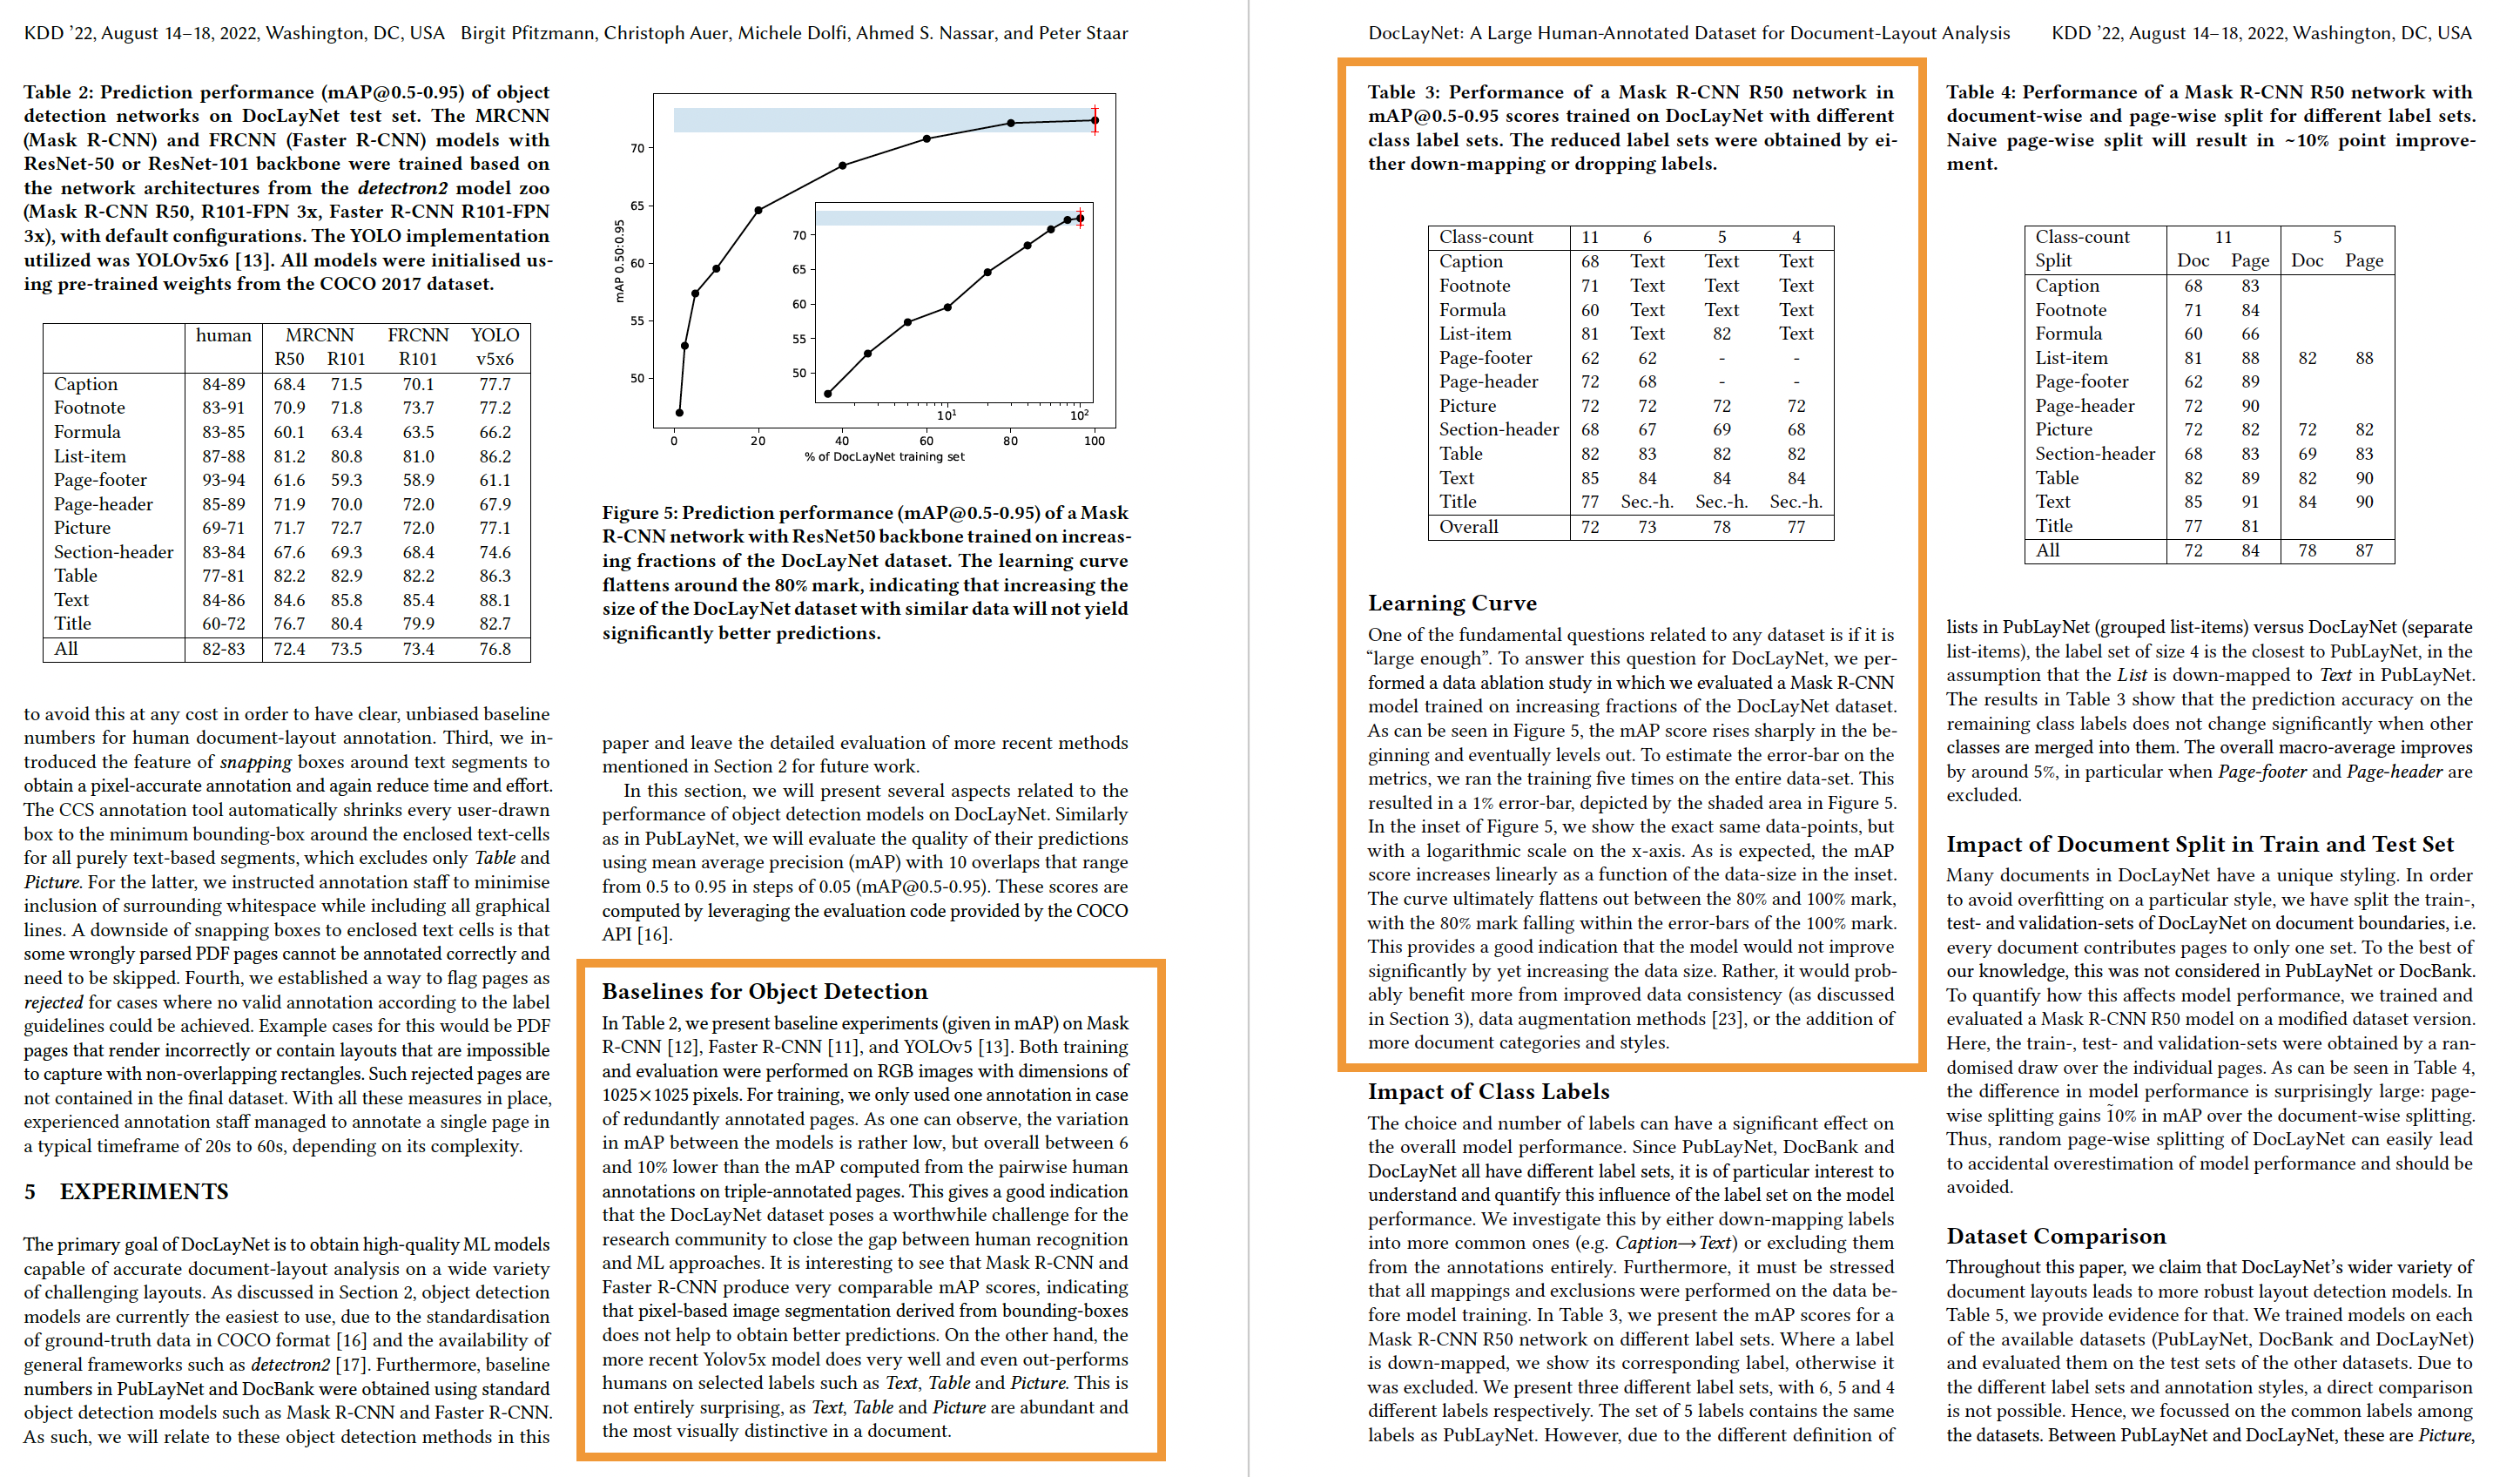

In [9]:
from IPython.display import Image

Image("resources/pdf_conversion_demo_slice.png")